In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import re
import plotly.express as px

# **ПРЕДОБРАБОТКА ДАННЫХ**

In [2]:
df = pd.read_csv('crypto_dataset2.csv')
df

,batch_time,date,source,text,author,coin,price,sentiment,topic,engagement,volume_24h,market_cap,volatility_24h,source_reliability,price_24h_ago,price_30d_ago
0,2025-03-04 11:00:30+03:00,2025-03-03 08:35:03+03:00,Reddit,So I started migrating my ftm to s and I just ...,Ant1125,{FTM},0.533059,neutral,общая тема,1,4.953577e+06,0.000000e+00,-23.26944,3,0.744593,0.495007
1,2025-03-04 11:00:30+03:00,2025-03-03 07:41:23+03:00,Reddit,Where is a few safe apps for ftm and can conne...,Put4Doe,{FTM},0.533059,positive,общая тема,1,4.953577e+06,0.000000e+00,-23.26944,3,0.744593,0.495007
2,2025-03-04 11:00:30+03:00,2025-03-04 04:55:05+03:00,Reddit,"If you are here, you have found something. You...",DSMSSBM,{ALGO},0.228989,neutral,общая тема,43,2.072452e+08,1.937794e+09,-15.93231,3,0.290556,0.348251
3,2025-03-04 11:00:30+03:00,2025-03-03 21:15:33+03:00,Reddit,I made a simple desktop application for viewin...,llevii,{Algorand},0.228989,neutral,общая тема,39,2.072452e+08,1.937794e+09,-15.93231,3,0.290556,0.348251
4,2025-03-04 11:00:30+03:00,2025-03-03 14:34:25+03:00,Reddit,Anybody know if sonic intends to support this ...,Reasonable_Let366,{Fantom},0.533059,neutral,общая тема,4,4.953577e+06,0.000000e+00,-23.26944,3,0.744593,0.495007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12036,2025-03-03 23:58:39+03:00,2025-03-03 23:26:37+03:00,Reddit,The \[X\] to BTC Ratio is the value of a Crypt...,GabeSter,{DOT},4.510000,neutral,общая тема,10,5.065680e+05,0.000000e+00,-11.40282,3,5.187919,5.952424
12037,2025-03-03 23:58:39+03:00,2025-03-03 23:26:37+03:00,Reddit,The \[X\] to BTC Ratio is the value of a Crypt...,GabeSter,{Bitcoin},85868.000000,neutral,общая тема,10,7.399191e+10,1.698218e+12,-9.07865,3,86005.256297,102382.394097
12038,2025-03-03 23:58:39+03:00,2025-03-03 23:26:37+03:00,Reddit,The \[X\] to BTC Ratio is the value of a Crypt...,GabeSter,{XRP},2.400000,neutral,общая тема,10,1.799568e+07,0.000000e+00,-16.44851,3,2.930073,NaN
12039,2025-03-03 23:58:39+03:00,2025-03-03 23:26:37+03:00,Reddit,The \[X\] to BTC Ratio is the value of a Crypt...,GabeSter,{ETH},2146.810000,neutral,общая тема,10,3.963100e+04,0.000000e+00,-13.89579,3,2532.891538,3154.508786


In [3]:
# Преобразование столбцов с датами
df['batch_time'] = pd.to_datetime(df['batch_time'])
df['date'] = pd.to_datetime(df['date'])

# Удаляем фигурные скобки из всех названий монет в столбце 'coin'
df['coin'] = df['coin'].str.strip('{}')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12041 entries, 0 to 12040
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype                    
---  ------              --------------  -----                    
 0   batch_time          12041 non-null  datetime64[ns, UTC+03:00]
 1   date                12041 non-null  datetime64[ns, UTC+03:00]
 2   source              12041 non-null  object                   
 3   text                12041 non-null  object                   
 4   author              12041 non-null  object                   
 5   coin                12041 non-null  object                   
 6   price               12041 non-null  float64                  
 7   sentiment           12041 non-null  object                   
 8   topic               12041 non-null  object                   
 9   engagement          12041 non-null  int64                    
 10  volume_24h          12041 non-null  float64                  
 11  market_cap     

In [4]:
print("Пропуски в данных:")
df.isnull().sum()

Пропуски в данных:


,0
batch_time,0
date,0
source,0
text,0
author,0
coin,0
price,0
sentiment,0
topic,0
engagement,0


In [5]:
# Обработка пропусков (если есть)
df['market_cap'] = df['market_cap'].fillna(0)  # Если нет капитализации, ставим 0

# Обработка пропусков в price_24h_ago
df['price_24h_filled'] = False  # Флаг для синтетических данных в price_24h_ago
mask_24h = df['price_24h_ago'].isna()  # Где пропуски
df.loc[mask_24h, 'price_24h_ago'] = df.loc[mask_24h, 'price']  # Заполняем текущей ценой
df.loc[mask_24h, 'price_24h_filled'] = True

# Обработка пропусков в price_30d_ago
df['price_30d_filled'] = False  # Флаг для синтетических данных в price_30d_ago
mask_30d = df['price_30d_ago'].isna()  # Где пропуски
df.loc[mask_30d, 'price_30d_ago'] = df.loc[mask_30d, 'price_24h_ago']  # Заполняем из price_24h_ago
df.loc[mask_30d, 'price_30d_filled'] = True

In [6]:
# Пример проверки заполненных строк
print("\nСтроки с заполненными price_30d_ago:")
df[df['price_30d_filled']][['coin', 'price', 'price_24h_ago', 'price_30d_ago', 'price_30d_filled']].head()


Строки с заполненными price_30d_ago:


,coin,price,price_24h_ago,price_30d_ago,price_30d_filled
6,LINK,13.850000,17.354656,17.354656,True
8,ADA,0.000431,0.000578,0.000578,True
13,Litecoin,102.860000,127.467191,127.467191,True
19,SHIB,0.000013,0.000015,0.000015,True
20,LINK,13.850000,17.354656,17.354656,True


market_cap: много нулей, но это не пропуски в классическом смысле — просто данные отсутствуют для мелких монет.

In [7]:
# Обработка пропусков в volatility_24h
df['volatility_filled'] = False
mask_vol = df['volatility_24h'].isna()
df.loc[mask_vol, 'volatility_24h'] = (
    (df.loc[mask_vol, 'price'] - df.loc[mask_vol, 'price_24h_ago']) /
    df.loc[mask_vol, 'price_24h_ago'] * 100
).fillna(0)  # Если price_24h_ago = 0, ставим 0
print("\nПропуски после обработки:")
df.isnull().sum()


Пропуски после обработки:


,0
batch_time,0
date,0
source,0
text,0
author,0
coin,0
price,0
sentiment,0
topic,0
engagement,0


## Проверка датасета на аномалии

In [8]:
df['coin'].unique()

array(['FTM', 'ALGO', 'Algorand', 'Fantom', 'Bitcoin', 'LINK', 'NEAR',
       'ADA', 'Dash', 'Litecoin', 'Ethereum', 'BTC', 'SHIB', 'XRP', 'ETH',
       'Shiba', 'TRX', 'VeChain', 'TRON', 'XLM', 'Stellar', 'Tezos',
       'Chainlink', 'SOL', 'XTZ', 'Solana', 'Cardano', 'Monero', 'XMR',
       'LTC', 'DOT', 'AVAX'], dtype=object)

Видим, что некоторые монеты повторяются. Причиной послужило то, что в источниках указаны разные варианты написания одной и той же монеты.

Заменим сокращения на настоящие названия

In [9]:
# Проверка аномалий в price
large_coins = ['Bitcoin', 'Ethereum', 'LINK', 'Litecoin', 'SOL', 'ETH', 'BTC']
anomalies = df[(df['coin'].isin(large_coins)) & (df['price'] < 0.1)]
print("\nПотенциальные аномалии в price:")
anomalies[['coin', 'price', 'price_24h_ago', 'price_30d_ago']]


Потенциальные аномалии в price:


,coin,price,price_24h_ago,price_30d_ago
16,BTC,0.000036,0.000048,0.000066
35,BTC,0.000036,0.000048,0.000066
115,BTC,0.000036,0.000048,0.000066
116,BTC,0.000036,0.000048,0.000066
119,BTC,0.000036,0.000048,0.000066
...,...,...,...,...
12010,BTC,0.000042,0.000042,0.000042
12019,BTC,0.000042,0.000042,0.000042
12031,BTC,0.000042,0.000042,0.000042
12034,BTC,0.000042,0.000042,0.000042


In [10]:
mapping = {
    'BTC': 'Bitcoin',
    'ETH': 'Ethereum',
    'XRP': 'Ripple',
    'LTC': 'Litecoin',
    'XMR': 'Monero',
    'ADA': 'Cardano',
    'SOL': 'Solana',
    'DOT': 'Polkadot',
    'LINK': 'Chainlink',
    'XLM': 'Stellar',
    'XTZ': 'Tezos',
    'VET': 'VeChain',
    'TRX': 'TRON',
    'BNB': 'Binance Coin',
    'SHIB': 'Shiba Inu',
    'AVAX': 'Avalanche',
    'FTM': 'Fantom',
    'ALGO': 'Algorand'
}

df['coin'] = df['coin'].replace(mapping)

In [11]:
btc_mean_price = df[(df['coin'] == 'Bitcoin') & (df['price'] > 1000)]['price'].median()
btc_mean_price_24h_ago = df[(df['coin'] == 'Bitcoin') & (df['price_24h_ago'] > 1000)]['price_24h_ago'].median()
btc_mean_price_30d_ago = df[(df['coin'] == 'Bitcoin') & (df['price_30d_ago'] > 1000)]['price_30d_ago'].median()
print(f"\nСредняя цена Bitcoin: {btc_mean_price}")
print(f"Средняя цена Bitcoin 24h назад: {btc_mean_price_24h_ago}")
print(f"Средняя цена Bitcoin 30d назад: {btc_mean_price_30d_ago}")


Средняя цена Bitcoin: 83811.0
Средняя цена Bitcoin 24h назад: 94261.5328653844
Средняя цена Bitcoin 30d назад: 94261.5328653844


In [12]:
# Исправляем аномалии (заменяем значения < 1000 USD на средние)
df.loc[(df['coin'] == 'Bitcoin') & (df['price'] < 1000), 'price'] = btc_mean_price
df.loc[(df['coin'] == 'Bitcoin') & (df['price_24h_ago'] < 1000), 'price_24h_ago'] = btc_mean_price_24h_ago
df.loc[(df['coin'] == 'Bitcoin') & (df['price_30d_ago'] < 1000), 'price_30d_ago'] = btc_mean_price_30d_ago

In [13]:
print("\nBitcoin после исправления (первые 10 строк):")
print(df[df['coin'] == 'Bitcoin'][['price', 'price_24h_ago', 'price_30d_ago']].head(10))


Bitcoin после исправления (первые 10 строк):
      price  price_24h_ago  price_30d_ago
5   83529.0   94261.532865  100674.787625
11  83529.0   94261.532865  100674.787625
15  83529.0   94261.532865  100674.787625
16  83811.0   94261.532865   94261.532865
17  83529.0   94261.532865  100674.787625
18  83529.0   94261.532865  100674.787625
35  83811.0   94261.532865   94261.532865
66  83529.0   94261.532865  100674.787625
81  83529.0   94261.532865  100674.787625
92  83529.0   94261.532865  100674.787625


In [14]:
# Описательные статистики
print("\nТоп-5 упоминаемых монет:")
df['coin'].value_counts().head()


Топ-5 упоминаемых монет:


,count
coin,
Bitcoin,2031
Chainlink,1298
Ethereum,1119
TRON,866
Ripple,780


In [15]:
print("\nРаспределение тональности:")
df['sentiment'].value_counts()


Распределение тональности:


,count
sentiment,
neutral,6706
positive,4683
negative,652


In [16]:
print("\nОписательная статистика цен:")
df['price'].describe()


Описательная статистика цен:


,price
count,1.204100e+04
mean,1.442200e+04
std,3.144645e+04
min,4.740030e-10
25%,3.524680e-01
50%,1.389000e+01
75%,2.051190e+03
max,8.635100e+04


In [17]:
print("\nОписательная статистика волатильности:")
df['volatility_24h'].describe()


Описательная статистика волатильности:


,volatility_24h
count,12041.000000
mean,-14.560657
std,5.593805
min,-27.781780
25%,-18.168760
50%,-15.668850
75%,-11.588000
max,0.000000


# **ГИПОТЕЗЫ**

In [18]:
# Гипотеза 1: Позитивная тональность связана с ростом цены
df['price_change_24h'] = (df['price'] - df['price_24h_ago']) / df['price_24h_ago'] * 100
print("\nСреднее изменение цены по тональности (%):")
df.groupby('sentiment')['price_change_24h'].mean()


Среднее изменение цены по тональности (%):


,price_change_24h
sentiment,
negative,-14.577286
neutral,-14.345594
positive,-14.445544


In [19]:
# Гипотеза 2: Вовлечённость влияет на волатильность
print("\nКорреляция вовлечённости и волатильности:")
df['engagement'].corr(df['volatility_24h'])


Корреляция вовлечённости и волатильности:


-0.07614176496817264

In [20]:
# Гипотеза 3: Время суток влияет на изменение цены
df['hour'] = df['date'].dt.hour
print("\nСреднее изменение цены по часам:")
df.groupby('hour')['price_change_24h'].mean()


Среднее изменение цены по часам:


,price_change_24h
hour,
0,-11.255238
1,-11.299072
2,-14.767651
3,-14.001225
4,-17.337158
5,-15.443709
6,-17.095056
7,-13.553967
8,-16.389444


In [21]:
# Гипотеза 4: Высокий объём торгов связан с большей волатильностью
print("\nГипотеза 4: Корреляция объёма торгов и волатильности:")
df['volume_24h'].corr(df['volatility_24h'])


Гипотеза 4: Корреляция объёма торгов и волатильности:


0.30185417777678447

In [22]:
# Гипотеза 5: Позитивные новости чаще утром (6-12 часов)
df['morning'] = df['hour'].between(6, 12)
print("\nГипотеза 5: Доля позитивных новостей утром (6-12) vs остальное время:")
df.groupby('morning')['sentiment'].value_counts(normalize=True).unstack().fillna(0)


Гипотеза 5: Доля позитивных новостей утром (6-12) vs остальное время:


sentiment,negative,neutral,positive
morning,,,
False,0.053402,0.579840,0.366758
True,0.056930,0.471535,0.471535


# **АНАЛИЗ ТЕКСТА**

In [23]:
# 3. Анализ текста
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english') + ['http', 'reddit', 'com', 'https'])

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = word_tokenize(text)
    return [word for word in tokens if word not in stop_words and len(word) > 3]

all_words = df['text'].apply(clean_text).explode()
words_top = all_words.value_counts().head(10)
print("\nТоп-10 слов в новостях:")
print(words_top)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Топ-10 слов в новостях:
text
shib           8664
crypto         7241
blockchain     5797
please         5353
bitcoin        5290
community      4622
vechainthor    4616
world          4500
x200b          4273
like           4260
Name: count, dtype: int64


# **ВИЗУАЛИЗАЦИЯ**

<ipython-input-24-04e7d7b96e88>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coins.index, y=top_coins.values, palette='magma')


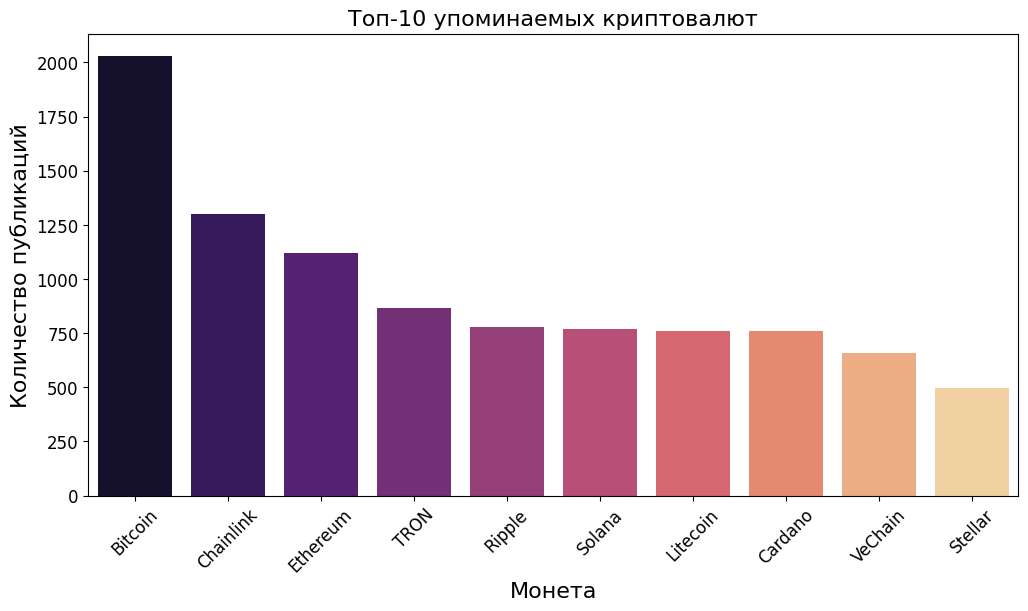

In [24]:
# График 1: Топ-10 монет
plt.figure(figsize=(12, 6))
top_coins = df['coin'].value_counts().head(10)
sns.barplot(x=top_coins.index, y=top_coins.values, palette='magma')
plt.title('Топ-10 упоминаемых криптовалют', fontsize=16)
plt.xlabel('Монета', fontsize=16)
plt.ylabel('Количество публикаций', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize = 12)
plt.show()

<ipython-input-25-b482633241dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='turbo')


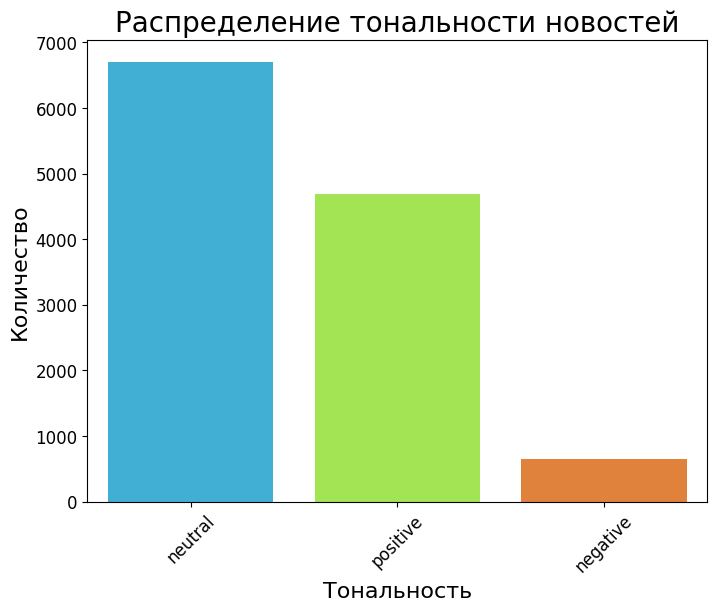

In [25]:
# График 2: Тональность
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='turbo')
plt.title('Распределение тональности новостей', fontsize=20)
plt.xlabel('Тональность', fontsize=16)
plt.ylabel('Количество', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize = 12)
plt.show()

In [26]:
df['sentiment']

,sentiment
0,neutral
1,positive
2,neutral
3,neutral
4,neutral
...,...
12036,neutral
12037,neutral
12038,neutral
12039,neutral


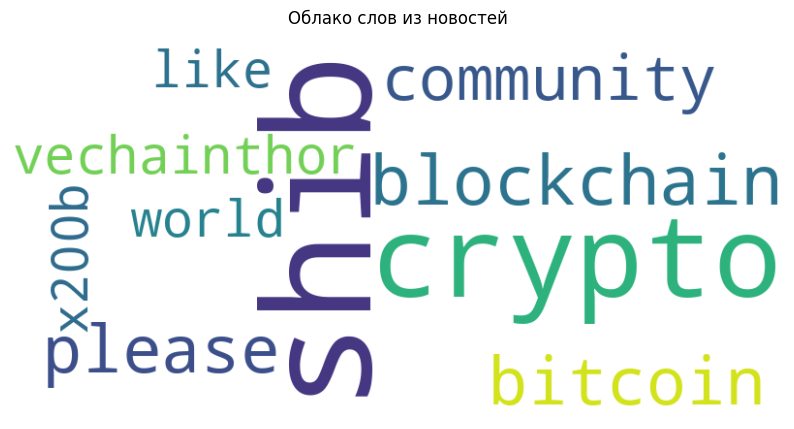

In [27]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_top)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов из новостей')
plt.show()

In [28]:
df.loc[:, :'volatility_24h'].head()

,batch_time,date,source,text,author,coin,price,sentiment,topic,engagement,volume_24h,market_cap,volatility_24h
0,2025-03-04 11:00:30+03:00,2025-03-03 08:35:03+03:00,Reddit,So I started migrating my ftm to s and I just ...,Ant1125,Fantom,0.533059,neutral,общая тема,1,4953577.0,0.000000e+00,-23.26944
1,2025-03-04 11:00:30+03:00,2025-03-03 07:41:23+03:00,Reddit,Where is a few safe apps for ftm and can conne...,Put4Doe,Fantom,0.533059,positive,общая тема,1,4953577.0,0.000000e+00,-23.26944
2,2025-03-04 11:00:30+03:00,2025-03-04 04:55:05+03:00,Reddit,"If you are here, you have found something. You...",DSMSSBM,Algorand,0.228989,neutral,общая тема,43,207245199.0,1.937794e+09,-15.93231
3,2025-03-04 11:00:30+03:00,2025-03-03 21:15:33+03:00,Reddit,I made a simple desktop application for viewin...,llevii,Algorand,0.228989,neutral,общая тема,39,207245199.0,1.937794e+09,-15.93231
4,2025-03-04 11:00:30+03:00,2025-03-03 14:34:25+03:00,Reddit,Anybody know if sonic intends to support this ...,Reasonable_Let366,Fantom,0.533059,neutral,общая тема,4,4953577.0,0.000000e+00,-23.26944


In [29]:
arr = df.groupby('coin', as_index = False)['source'].count().sort_values(by = 'source', ascending = False)['coin'].head().reset_index(drop=True)
df_top5 = df[df['coin'].isin(arr)]
df_top5

,batch_time,date,source,text,author,coin,price,sentiment,topic,engagement,...,volatility_24h,source_reliability,price_24h_ago,price_30d_ago,price_24h_filled,price_30d_filled,volatility_filled,price_change_24h,hour,morning
5,2025-03-04 11:00:30+03:00,2025-03-03 02:27:02+03:00,Reddit,Or will it lag abit behind Bitcoin?,No-Arm-4557,Bitcoin,83529.00,negative,общая тема,4,...,-8.98792,3,94261.532865,100674.787625,False,False,False,-11.385910,2,False
6,2025-03-04 11:00:30+03:00,2025-03-03 02:18:43+03:00,Reddit,Does anyone have the link for briding from Fan...,Former_Preference_14,Chainlink,13.85,neutral,общая тема,3,...,-14.87287,3,17.354656,17.354656,False,True,False,-20.194328,2,False
11,2025-03-04 11:00:29+03:00,2025-03-02 21:42:30+03:00,Reddit,Let’s imagine a world where Shiba Inu (SHIB) r...,H3r34lolz,Bitcoin,83529.00,neutral,рост цен,18,...,-8.98792,3,94261.532865,100674.787625,False,False,False,-11.385910,21,False
14,2025-03-04 11:00:29+03:00,2021-12-05 02:42:45+03:00,Reddit,MULTI COIN ofrece servicios de recuperación de...,LindoCruz,Ethereum,2079.52,neutral,общая тема,1,...,-12.49594,3,2517.338239,3125.038680,False,False,False,-17.392110,2,False
15,2025-03-04 11:00:29+03:00,2021-12-05 02:42:45+03:00,Reddit,MULTI COIN ofrece servicios de recuperación de...,LindoCruz,Bitcoin,83529.00,neutral,общая тема,1,...,-8.98792,3,94261.532865,100674.787625,False,False,False,-11.385910,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12034,2025-03-03 23:58:39+03:00,2025-03-03 23:14:09+03:00,Reddit,"Hi All,\n\nI have followed crypto relatively s...",Drfunky0811,Bitcoin,83811.00,positive,рост цен,0,...,-10.30852,3,94261.532865,94261.532865,True,True,False,-11.086742,23,False
12037,2025-03-03 23:58:39+03:00,2025-03-03 23:26:37+03:00,Reddit,The \[X\] to BTC Ratio is the value of a Crypt...,GabeSter,Bitcoin,85868.00,neutral,общая тема,10,...,-9.07865,3,86005.256297,102382.394097,False,False,False,-0.159591,23,False
12038,2025-03-03 23:58:39+03:00,2025-03-03 23:26:37+03:00,Reddit,The \[X\] to BTC Ratio is the value of a Crypt...,GabeSter,Ripple,2.40,neutral,общая тема,10,...,-16.44851,3,2.930073,2.930073,False,True,False,-18.090771,23,False
12039,2025-03-03 23:58:39+03:00,2025-03-03 23:26:37+03:00,Reddit,The \[X\] to BTC Ratio is the value of a Crypt...,GabeSter,Ethereum,2146.81,neutral,общая тема,10,...,-13.89579,3,2532.891538,3154.508786,False,False,False,-15.242719,23,False


In [30]:
fig = px.histogram(df_top5, x = 'sentiment', color = 'coin')
fig.update_traces(marker_line_width= 1, marker_line_color = 'Black')
fig.update_layout(title = 'Распределение тональности по монетам', xaxis_title = 'Настроение', yaxis_title = 'Количество новостей',
                  title_font_size = 22,
                  xaxis_title_font_size = 22,
                  xaxis_tickfont_size = 22,
                  yaxis_tickfont_size = 22,
                  yaxis_title_font_size = 22,
                  legend_font_size = 22)
fig.show()

In [31]:
df_filter = df.copy()
df_filter.loc[df_filter['coin'].isin(arr) == False, 'coin'] = 'Other'
df_filter_group = df_filter.groupby('coin', as_index = False)['source'].count()
df_filter_group.head()

,coin,source
0,Bitcoin,2031
1,Chainlink,1298
2,Ethereum,1119
3,Other,5947
4,Ripple,780


In [32]:
fig = px.pie(df_filter_group, values = 'source', names = 'coin')
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size = 18)
fig.update_layout(showlegend = False, title = 'Рапсределение количества новостей по монетам', title_font_size = 22)
fig.show()

In [33]:
fig = px.histogram(df, x = 'hour', color = 'sentiment')
fig.update_traces(marker_line_width= 1, marker_line_color = 'Black')
fig.update_layout(title = 'Как тональность новостей меняется в течение суток', xaxis_title = 'Часы', yaxis_title = 'Количество новостей',
                  title_font_size = 22,
                  xaxis_title_font_size = 22,
                  xaxis_tickfont_size = 22,
                  yaxis_tickfont_size = 22,
                  yaxis_title_font_size = 22,
                  legend_font_size = 22)
fig.show()


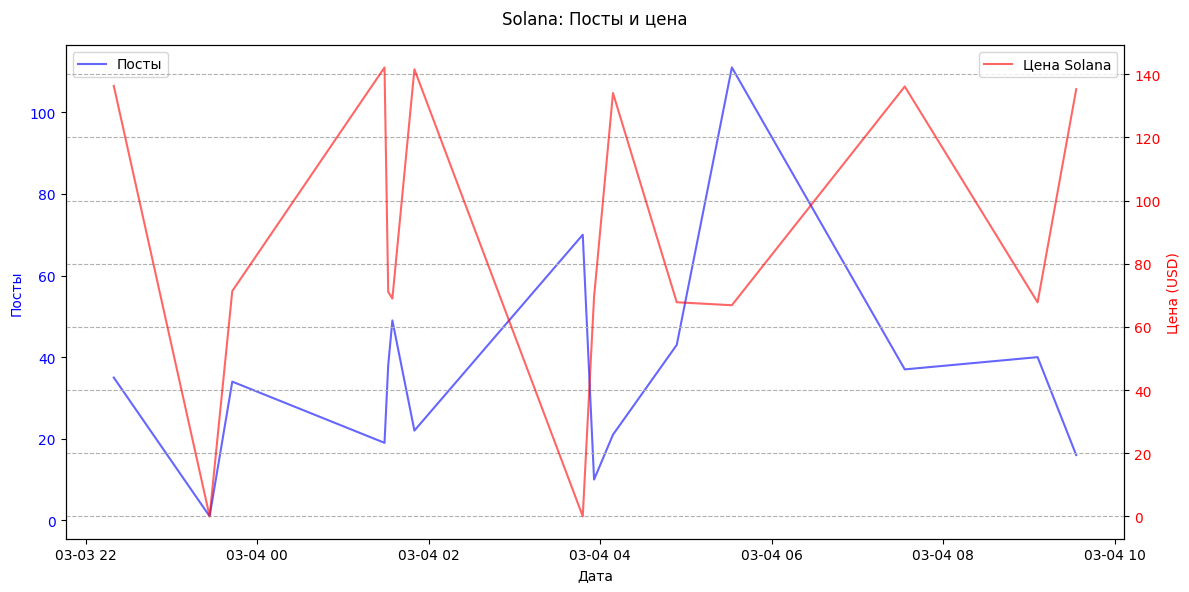

In [37]:
sol_mentions = df[df['coin'] == 'Solana'].groupby('date').size().reset_index(name='posts')
sol_prices = df[df['coin'] == 'Solana'].groupby('date')['price'].mean().reset_index()

# Объединяем данные по дате
sol_df = sol_mentions.merge(sol_prices, on='date')

# Оставляем данные только за последние 24 часа
latest_date = sol_df['date'].max()
new_sol_df = sol_df[sol_df['date'] >= latest_date - pd.Timedelta(days=1)]

# Построение графика
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Дата')
ax1.set_ylabel('Посты', color='blue')
ax1.plot(new_sol_df['date'], new_sol_df['posts'], label='Посты', color='blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='blue')

# Вторая ось для цены
ax2 = ax1.twinx()
ax2.set_ylabel('Цена (USD)', color='red')
ax2.plot(new_sol_df['date'], new_sol_df['price'], label='Цена Solana', color='red', alpha=0.6)
ax2.tick_params(axis='y', labelcolor='red')

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
fig.suptitle('Solana: Посты и цена')
fig.tight_layout()
plt.grid(linestyle='--')
plt.show()

